In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data/[1h]BTCUSDT.csv')

In [25]:
index = [x for x in range(0, len(df["Open"]))]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Per Day Difference')]

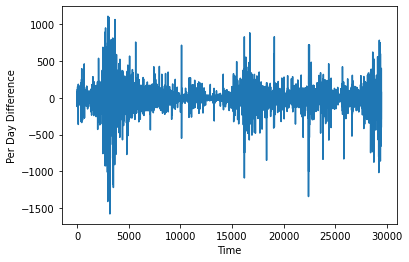

In [26]:
delta_day = []
for i in range(len(df["Open"])):
    delta_day.append(df["Close"][i] - df["Open"][i])
fig, ax = plt.subplots()
ax.plot(index, delta_day)
ax.set(xlabel='Time', ylabel='Per Day Difference')

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
number_of_predictions = 200
data = delta_day
model = ARIMA(data, order=(number_of_predictions, 2, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data)+number_of_predictions, typ='levels')
print(yhat)

e:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [30]:
growth = [x/yhat[-1] for x in yhat]
print(growth)

[0.712567158193616, 0.5233902633950179, 0.5696887825706366, 0.5783898099177995, 0.5780188902336474, 0.5800093161765623, 0.5822939707794081, 0.584447004298306, 0.5865938278445765, 0.5887473708625974, 0.5909008062727114, 0.5930539243565481, 0.5952070668420877, 0.5973602231434125, 0.5995133774320963, 0.6016665311768082, 0.6038196850514587, 0.6059728389444573, 0.6081259928300825, 0.61027914671527, 0.6124323006008392, 0.6145854544864064, 0.6167386083719555, 0.6188917622575056, 0.6210449161430567, 0.6231980700286075, 0.6253512239141583, 0.6275043777997091, 0.62965753168526, 0.6318106855708108, 0.6339638394563616, 0.6361169933419124, 0.6382701472274632, 0.640423301113014, 0.6425764549985648, 0.6447296088841156, 0.6468827627696664, 0.6490359166552172, 0.651189070540768, 0.6533422244263188, 0.6554953783118697, 0.6576485321974205, 0.6598016860829713, 0.6619548399685221, 0.6641079938540729, 0.6662611477396237, 0.6684143016251746, 0.6705674555107254, 0.6727206093962762, 0.674873763281827, 0.677026

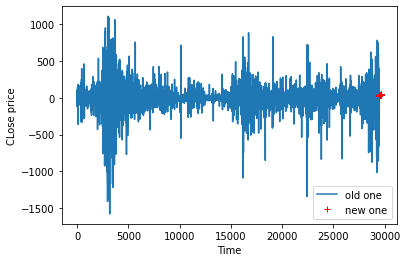

In [31]:
new_index = [(index[-1] + x) for x in range(number_of_predictions+1)]
fig, ax = plt.subplots()
line1, = ax.plot(index, delta_day,label="old one")
line2, = ax.plot(new_index,yhat,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

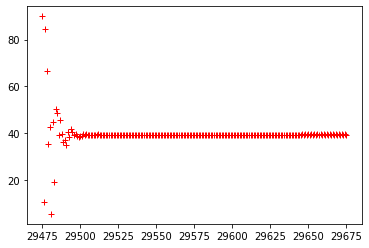

In [36]:
new_index = [(index[-1] + x) for x in range(number_of_predictions+1)]
fig, ax = plt.subplots()
line2, = ax.plot(new_index,yhat,'r+',label="new one")
plt.show()